In [1]:
import numpy as np # linear algebra
import pandas as pd # # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("C:/Users/vsubramanian/Desktop/Python/Data/ML Projects/Linear Regression/input"))
# Any results you write to the current directory are saved as output.

['Ecommerce Customers', 'Online_Sales.csv', 'TSLA.csv']


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
Sales = pd.read_csv('C:/Users/vsubramanian/Desktop/Python/Data/ML Projects/Linear Regression/input/Online_Sales.csv')

In [6]:
Sales.head()

,Online Store,E-commerce Sales,Online Adv.
0,1,368,1.7
1,2,340,1.5
2,3,665,2.8
3,4,954,5.0
4,5,331,1.3


In [7]:
Sales.describe()

,Online Store,E-commerce Sales,Online Adv.
count,7.000000,7.000000,7.000000
mean,4.000000,512.857143,2.257143
std,2.160247,231.761680,1.325213
min,1.000000,331.000000,1.300000
25%,2.500000,354.000000,1.400000
50%,4.000000,376.000000,1.700000
75%,5.500000,610.500000,2.500000
max,7.000000,954.000000,5.000000


In [8]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

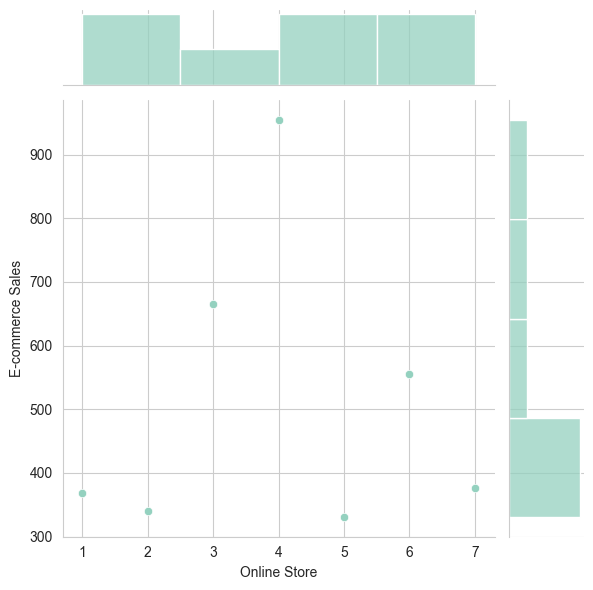

In [14]:
sns.jointplot(x='Online Store',y='E-commerce Sales',data=Sales)

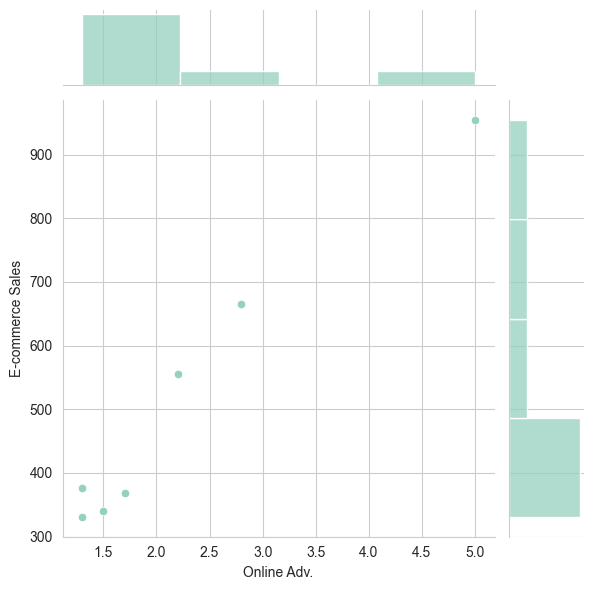

In [18]:
sns.jointplot(x='Online Adv.',y='E-commerce Sales',data=Sales)

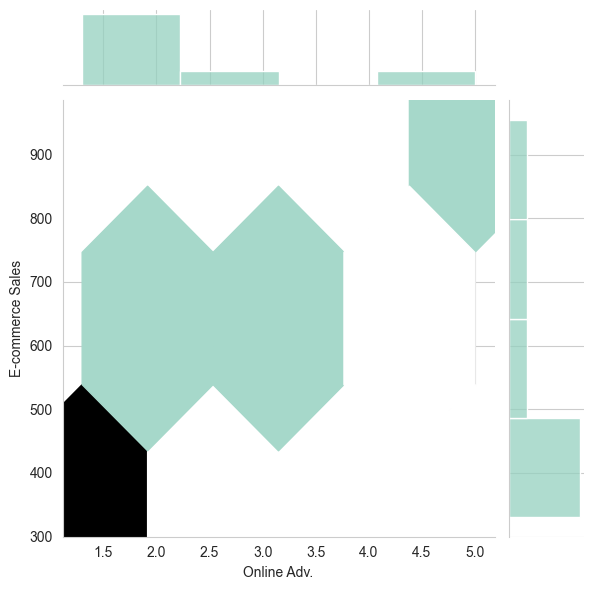

In [19]:
sns.jointplot(x='Online Adv.',y='E-commerce Sales',kind="hex",data=Sales)

c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


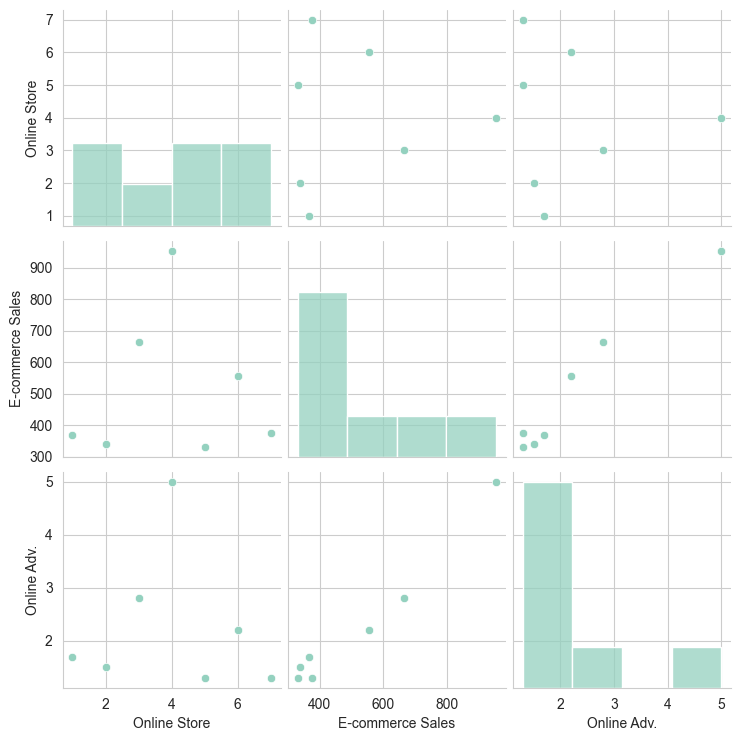

In [20]:
sns.pairplot(Sales)

c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


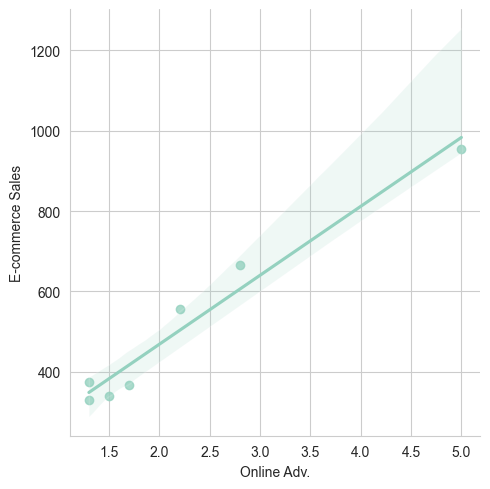

In [21]:
sns.lmplot(x='Online Adv.',y='E-commerce Sales',data=Sales)

In [22]:
X = Sales[['Online Store','Online Adv.']]

In [23]:
Y = Sales['E-commerce Sales']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression()

In [28]:
lm.fit(X_train,y_train)

LinearRegression()

In [29]:
lm.coef_

array([ 13.52732019, 169.08730319])

In [30]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

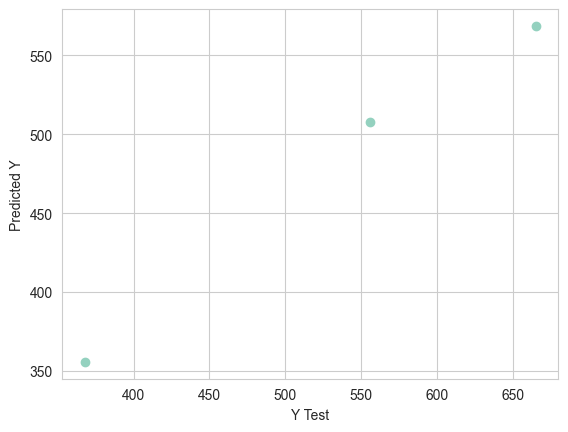

In [31]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [32]:
from sklearn import metrics

In [33]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE :   52.24384452449376
MSE :   3912.4192908999707
RMAE :   62.54933485577581


C:\Users\vsubramanian\AppData\Local\Temp\ipykernel_16992\3462226243.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - predictions,bins=50)


<Axes: xlabel='E-commerce Sales', ylabel='Density'>

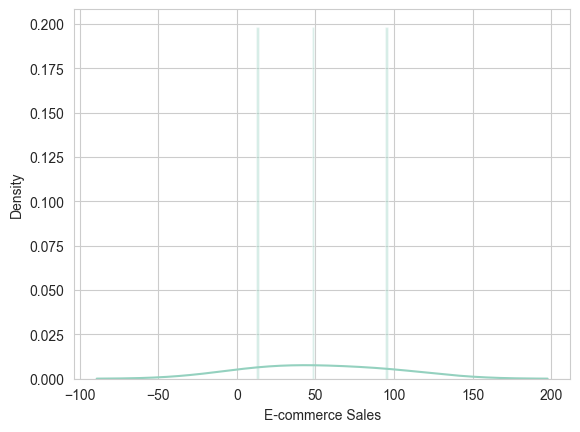

In [34]:
sns.distplot(y_test - predictions,bins=50)

In [35]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Online Store,13.527320
Online Adv.,169.087303
